# **TikTok (case-study)**


## Cleaning and EDA
In this stage, I will conduct exploratory data analysis on data for the claims classification project. I’ll also use Tableau to create visuals for an executive summary to help non-technical stakeholders engage and interact with the data.

### Approach
1. Imports, links, and loading
2. Data Cleaning
3. Data Exploration
4. Tableau Dashboard


### Imports, links, and loading


In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np
# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv", index_col=0)

In [3]:
# Display and examine the first few rows of the dataframe
data.head()

,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
#,,,,,,,,,,,
1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [4]:
# Get the size of the data
data.size

213202

In [5]:
# Get the shape of the data
data.shape

(19382, 11)

In [6]:
# Get basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19382 entries, 1 to 19382
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   claim_status              19084 non-null  object 
 1   video_id                  19382 non-null  int64  
 2   video_duration_sec        19382 non-null  int64  
 3   video_transcription_text  19084 non-null  object 
 4   verified_status           19382 non-null  object 
 5   author_ban_status         19382 non-null  object 
 6   video_view_count          19084 non-null  float64
 7   video_like_count          19084 non-null  float64
 8   video_share_count         19084 non-null  float64
 9   video_download_count      19084 non-null  float64
 10  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.8+ MB


Generate a table of descriptive statistics, using `.describe()`.

In [7]:
# Generate a table of descriptive statistics
data.describe()

,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


### Data Cleaning

In [8]:
# clean null values
data.dropna(inplace=True)
print("Number of null values in each column after cleaning")
data.isnull().sum()

Number of null values in each column after cleaning


claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64

In [9]:
# convert data types of some columns to appropriate ones
cols = ["video_view_count", "video_like_count", "video_share_count", "video_download_count", "video_comment_count"]
for col in cols:
    data[col] = data[col].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19084 entries, 1 to 19084
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   claim_status              19084 non-null  object
 1   video_id                  19084 non-null  int64 
 2   video_duration_sec        19084 non-null  int64 
 3   video_transcription_text  19084 non-null  object
 4   verified_status           19084 non-null  object
 5   author_ban_status         19084 non-null  object
 6   video_view_count          19084 non-null  int64 
 7   video_like_count          19084 non-null  int64 
 8   video_share_count         19084 non-null  int64 
 9   video_download_count      19084 non-null  int64 
 10  video_comment_count       19084 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 1.7+ MB


In [10]:
data.head()

,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
#,,,,,,,,,,,
1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296,19425,241,1,0
2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877,77355,19034,1161,684
3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185,97690,2858,833,329
4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506,239954,34812,1234,584
5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167,34987,4110,547,152


### Data Visualizations

In [11]:
# Change the deafult view for plots in seaborn
sns.set(rc={'figure.figsize': (15, 6), 'axes.labelsize': 14, 'axes.titlesize': 16})
# colors of tiktok logo to use them in the plots
# Turqoise, Red, Black, White respectively
colors = ["#25F4EE", "#FE2C55", "#000000", "#FFFFFF"]


#### **video_duration_sec**

Create a box plot to examine the spread of values in the `video_duration_sec` column.

Text(0.5, 0, 'video duration (in seconds)')

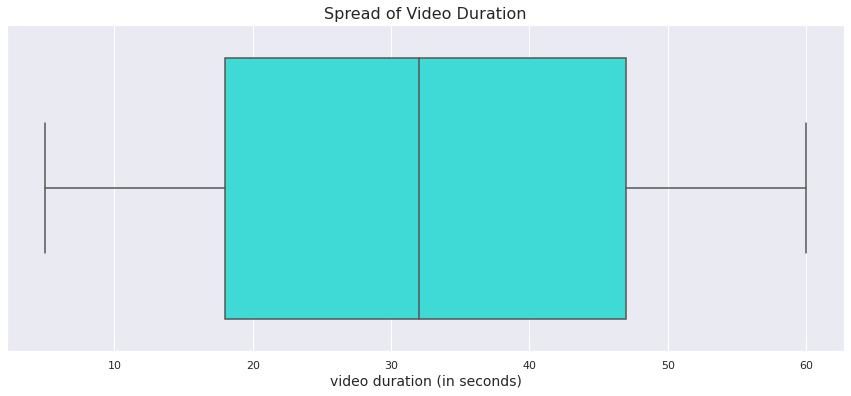

In [12]:
# Create a boxplot to visualize distribution of `video_duration_sec`
ax = sns.boxplot(data.video_duration_sec, color=colors[0])
ax.set_title("Spread of Video Duration")
ax.set_xlabel("video duration (in seconds)")

Create a histogram of the values in the `video_duration_sec` column to further explore the distribution of this variable.

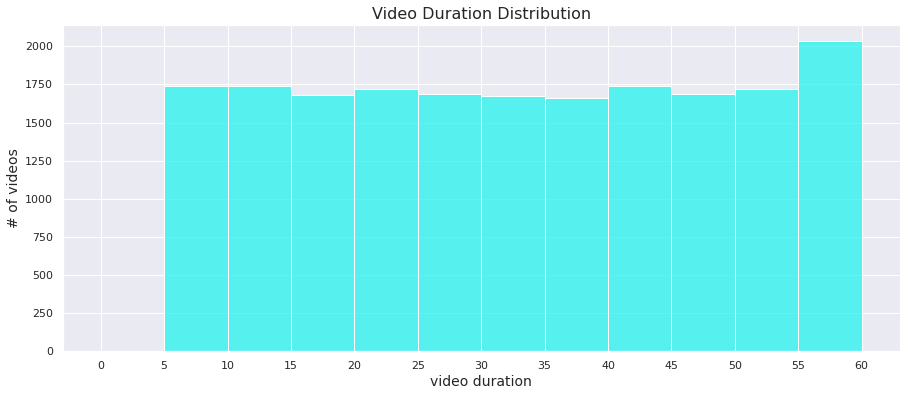

In [13]:
# Create a histogram
ax = sns.histplot(data=data, x="video_duration_sec", color=colors[0], bins=range(0, 61, 5))
ax.set_title("Video Duration Distribution")
ax.set_xlabel("video duration")
ax.set_ylabel("# of videos")
ax.set_xticks(range(0, 61, 5));

#### **video_view_count**

Create a box plot to examine the spread of values in the `video_view_count` column.

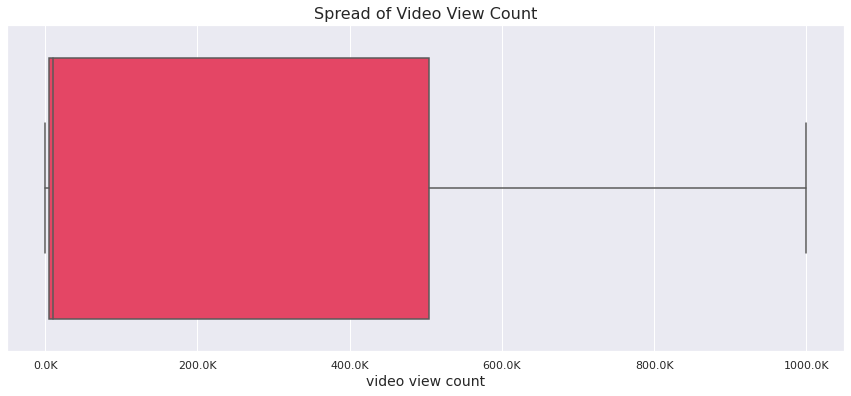

In [14]:
def to_thousands(x):
    "Convert large numbers to thousands to be more readable."

    return str(round(x * 1e-3, 2)) + "K"

# Create a boxplot to visualize distribution of `video_view_count`
ax = sns.boxplot(data.video_view_count, color=colors[1])
ax.set_title("Spread of Video View Count")
ax.set_xlabel("video view count")
xticklabels = list(map(lambda x: to_thousands(x), ax.get_xticks()))
ax.set_xticklabels(xticklabels);

Create a histogram of the values in the `video_view_count` column to further explore the distribution of this variable.

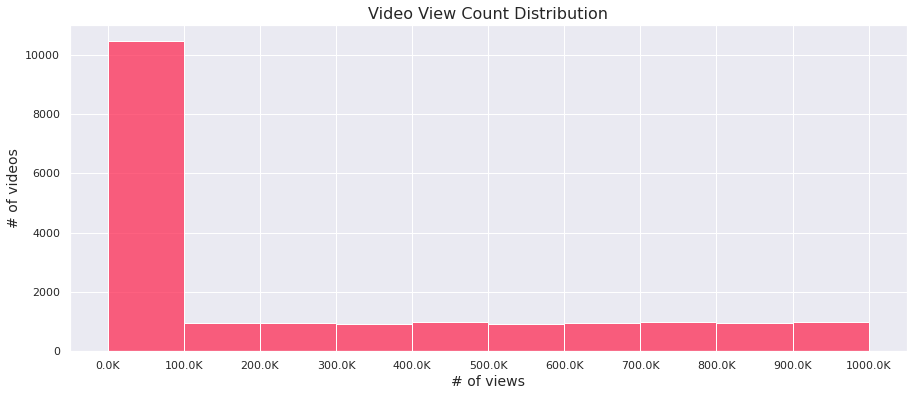

In [15]:
# Create a histogram
n_bins = range(0, 1000001, 100000)
ax = sns.histplot(data, x="video_view_count", bins=n_bins, color=colors[1])
ax.set_title("Video View Count Distribution")
ax.set_xlabel("# of views")
ax.set_ylabel("# of videos")
ax.set_xticks(n_bins)
xticklabels = list(map(lambda x: to_thousands(x), ax.get_xticks()))
ax.set_xticklabels(xticklabels);

**Question:** What do you notice about the distribution of this variable?

#### **video_like_count**

Create a box plot to examine the spread of values in the `video_like_count` column.

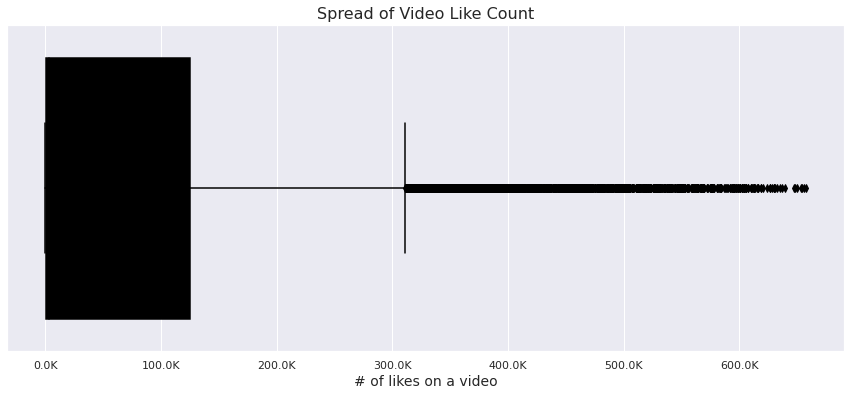

In [16]:
# Create a boxplot to visualize distribution of `video_like_count`
ax = sns.boxplot(data.video_like_count, color=colors[2])
ax.set_title("Spread of Video Like Count")
ax.set_xlabel("# of likes on a video")
xticklabels = list(map(lambda x: to_thousands(x), ax.get_xticks()))
ax.set_xticklabels(xticklabels);

Create a histogram of the values in the `video_like_count` column to further explore the distribution of this variable.

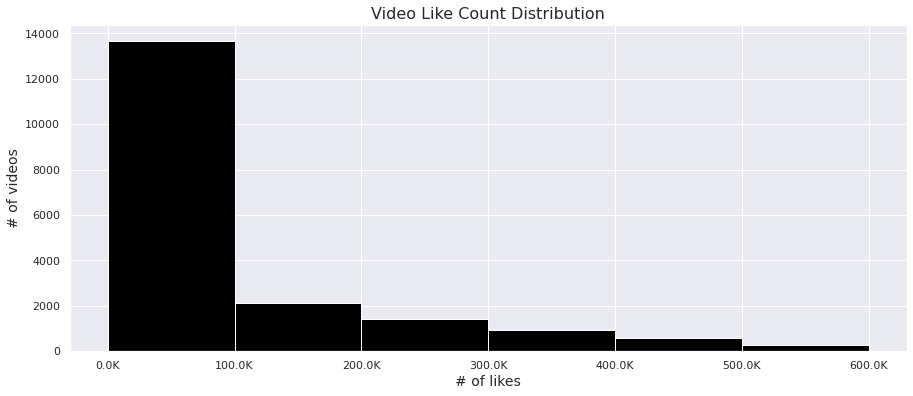

In [17]:
# Create a histogram
n_bins = range(0, 600001, 100000)
ax = sns.histplot(data, x="video_like_count", bins=n_bins, color=colors[2], alpha=1)
ax.set_title("Video Like Count Distribution")
ax.set_xlabel("# of likes")
ax.set_ylabel("# of videos")
ax.set_xticks(n_bins)
xticklabels = list(map(lambda x: to_thousands(x), ax.get_xticks()))
ax.set_xticklabels(xticklabels);

#### **video_comment_count**

Create a box plot to examine the spread of values in the `video_comment_count` column.

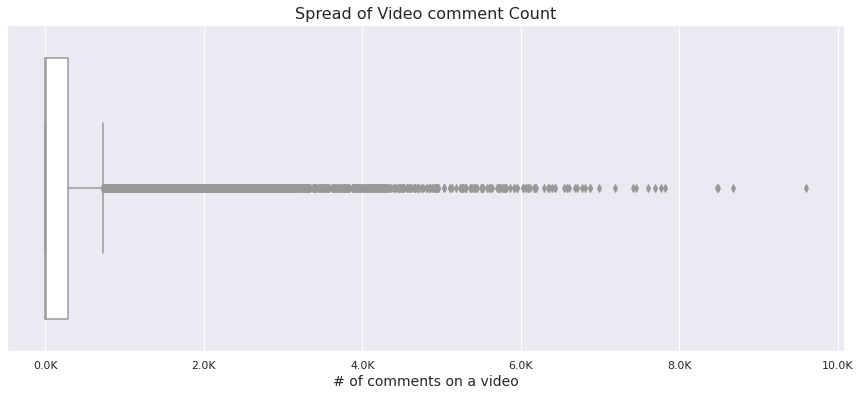

In [18]:
# Create a boxplot to visualize distribution of `video_comment_count`
ax = sns.boxplot(data.video_comment_count, color=colors[3])
ax.set_title("Spread of Video comment Count")
ax.set_xlabel("# of comments on a video")
xticklabels = list(map(lambda x: to_thousands(x), ax.get_xticks()))
ax.set_xticklabels(xticklabels);

Create a histogram of the values in the `video_comment_count` column to further explore the distribution of this variable.

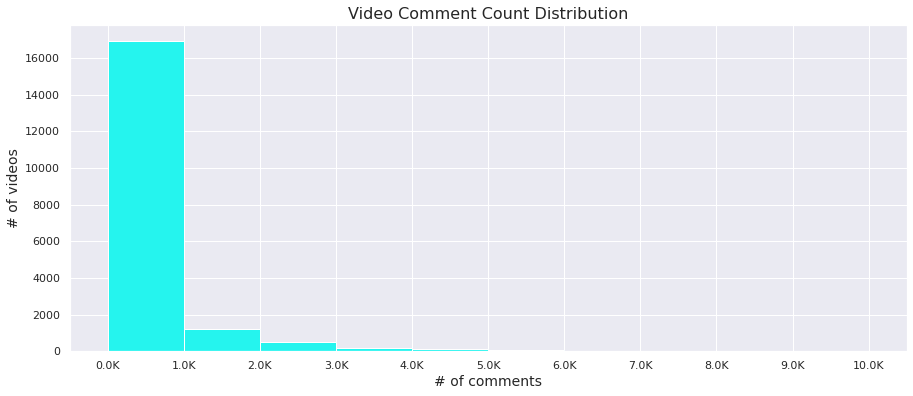

In [19]:
# Create a histogram
n_bins = range(0, 10001, 1000)
ax = sns.histplot(data, x="video_comment_count", bins=n_bins, color=colors[0], alpha=1)
ax.set_title("Video Comment Count Distribution")
ax.set_xlabel("# of comments")
ax.set_ylabel("# of videos")
ax.set_xticks(n_bins)
xticklabels = list(map(lambda x: to_thousands(x), ax.get_xticks()))
ax.set_xticklabels(xticklabels);

**Question:** What do you notice about the distribution of this variable?

#### **video_share_count**

Create a box plot to examine the spread of values in the `video_share_count` column.

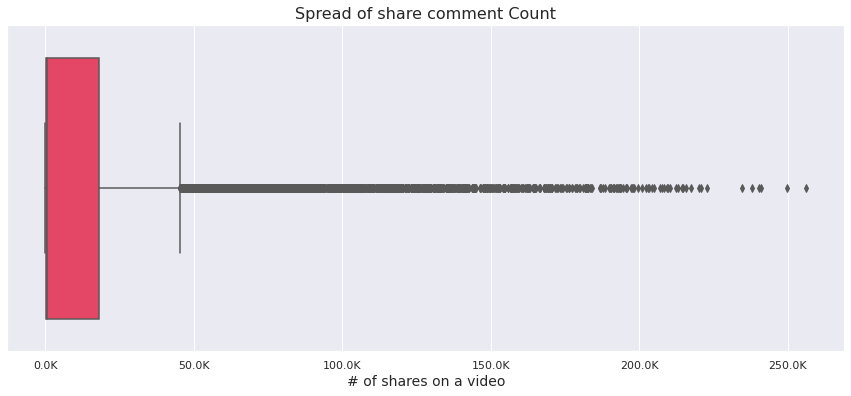

In [20]:
# Create a boxplot to visualize distribution of `video_share_count`
ax = sns.boxplot(data.video_share_count, color=colors[1])
ax.set_title("Spread of share comment Count")
ax.set_xlabel("# of shares on a video")
xticklabels = list(map(lambda x: to_thousands(x), ax.get_xticks()))
ax.set_xticklabels(xticklabels);

*Create* a histogram of the values in the `video_share_count` column to further explore the distribution of this variable.

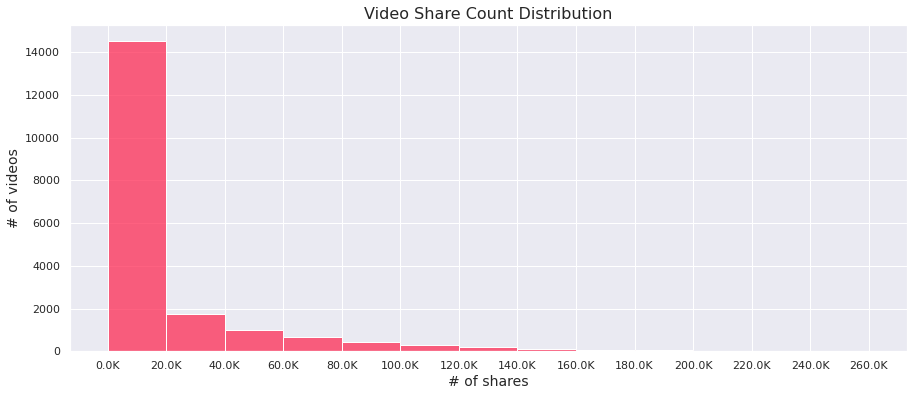

In [21]:
# Create a histogram
n_bins = range(0, 260001, 20000)
ax = sns.histplot(data, x="video_share_count", bins=n_bins, color=colors[1])
ax.set_title("Video Share Count Distribution")
ax.set_xlabel("# of shares")
ax.set_ylabel("# of videos")
ax.set_xticks(n_bins)
xticklabels = list(map(lambda x: to_thousands(x), ax.get_xticks()))
ax.set_xticklabels(xticklabels);

#### **video_download_count**

Create a box plot to examine the spread of values in the `video_download_count` column.

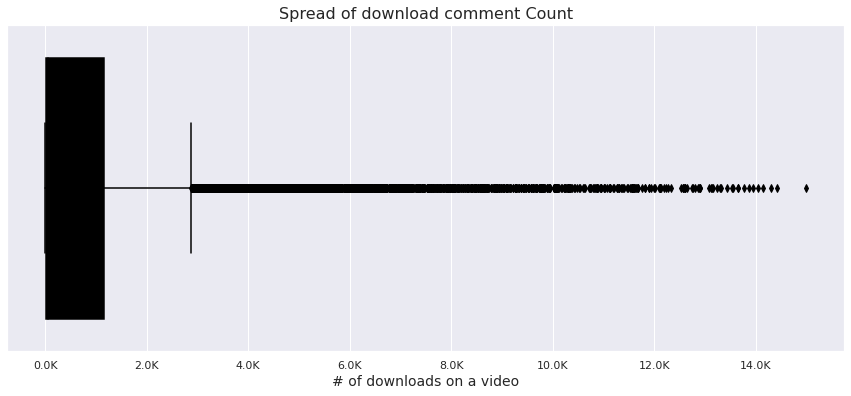

In [22]:
# Create a boxplot to visualize distribution of `video_download_count`
ax = sns.boxplot(data.video_download_count, color=colors[2])
ax.set_title("Spread of download comment Count")
ax.set_xlabel("# of downloads on a video")
xticklabels = list(map(lambda x: to_thousands(x), ax.get_xticks()))
ax.set_xticklabels(xticklabels);

Create a histogram of the values in the `video_download_count` column to further explore the distribution of this variable.

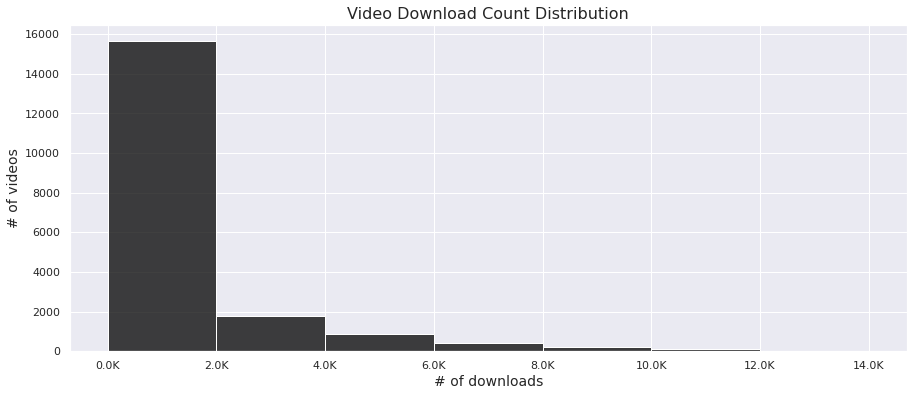

In [23]:
# Create a histogram
n_bins = range(0, 14001, 2000)
ax = sns.histplot(data, x="video_download_count", bins=n_bins, color=colors[2])
ax.set_title("Video Download Count Distribution")
ax.set_xlabel("# of downloads")
ax.set_ylabel("# of videos")
ax.set_xticks(n_bins)
xticklabels = list(map(lambda x: to_thousands(x), ax.get_xticks()))
ax.set_xticklabels(xticklabels);

#### **Claim status by verification status**

Now, create a histogram with four bars: one for each combination of claim status and verification status.

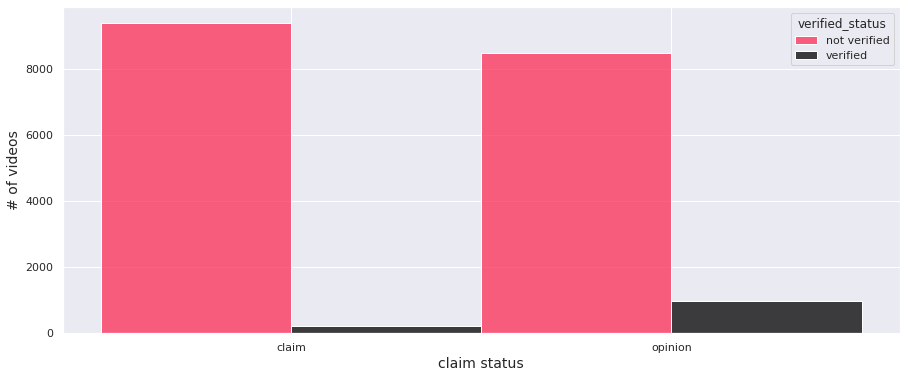

In [24]:
# Create a histogram
ax = sns.histplot(data=data, x="claim_status", hue="verified_status", multiple="dodge", palette=colors[1:3])
ax.set_ylabel("# of videos")
ax.set_xlabel("claim status");

#### **Claim status by author ban status**

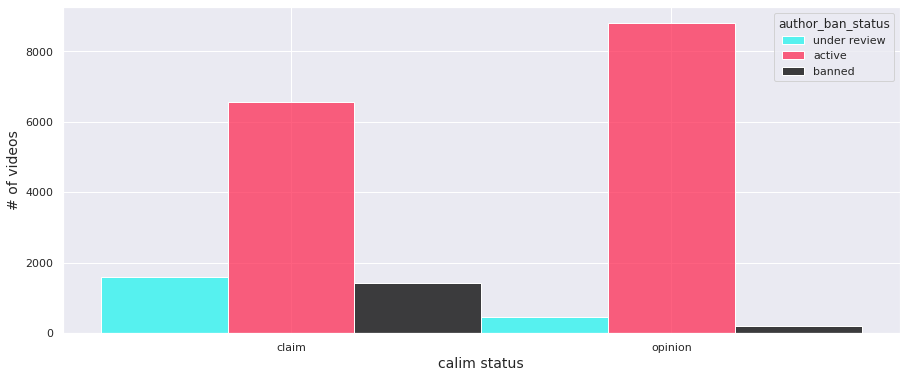

In [25]:
# Create a histogram
ax = sns.histplot(data=data, x="claim_status", hue="author_ban_status", multiple="dodge", palette=colors[:3])
ax.set_ylabel("# of videos")
ax.set_xlabel("calim status");

#### **Median view counts by ban status**

Create a bar plot with three bars: one for each author ban status. The height of each bar should correspond with the median number of views for all videos with that author ban status.

In [26]:
# Calculate the median view count for autho ban status.
med_view_counts = data.groupby("author_ban_status").median()[["video_view_count"]].reset_index()

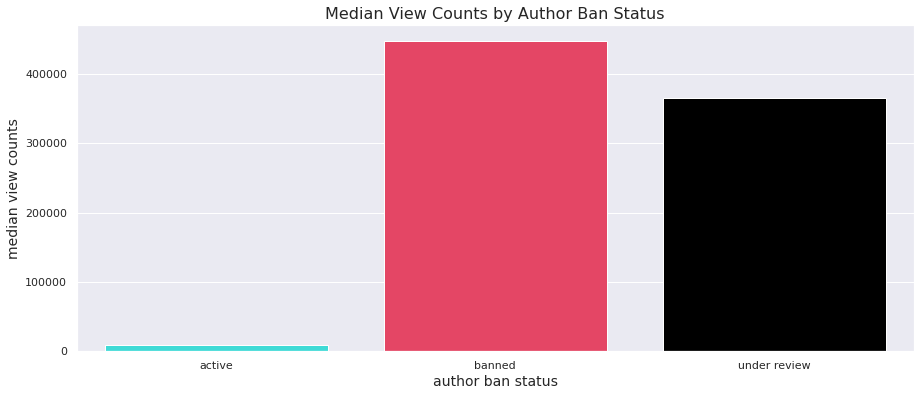

In [27]:
# Create a bar plot
ax = sns.barplot(data=med_view_counts, x="author_ban_status", y="video_view_count", palette=colors[:3])
ax.set_title("Median View Counts by Author Ban Status")
ax.set_xlabel("author ban status")
ax.set_ylabel("median view counts");

In [28]:
# Calculate the median view count for claim status.
med_view_counts = data.groupby("claim_status").median()[["video_view_count"]].reset_index()

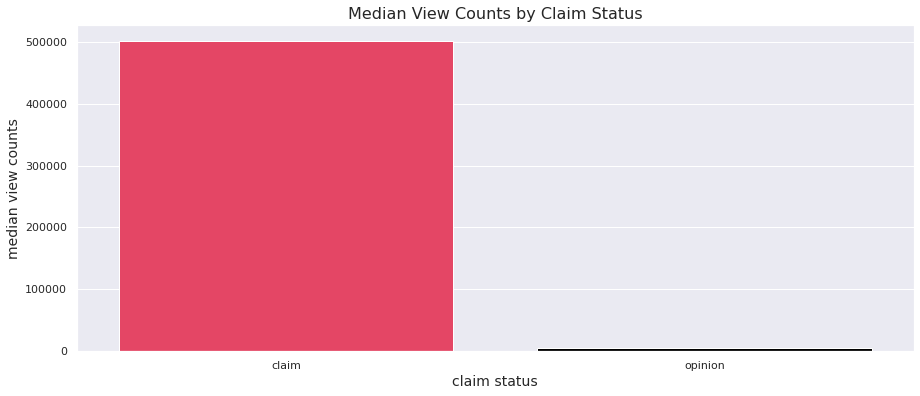

In [29]:
# Create a bar plot
ax = sns.barplot(data=med_view_counts, x="claim_status", y="video_view_count", palette=colors[1:3])
ax.set_title("Median View Counts by Claim Status")
ax.set_xlabel("claim status")
ax.set_ylabel("median view counts");

#### **Total views by claim status**

Create a pie graph that depicts the proportions of total views for claim videos and total views for opinion videos.

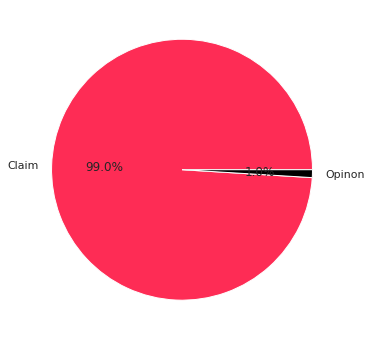

In [30]:
# Create a pie graph
df = data.groupby("claim_status").sum()["video_view_count"]
ax = plt.pie(df, labels=["Claim", "Opinon"], colors=colors[1:3], autopct='%1.1f%%')

### Correlation Analysis

In [31]:
df = data.groupby(["claim_status", "verified_status", "author_ban_status"]).min().iloc[:, 1:]
df

video_duration_sec  \
claim_status verified_status author_ban_status                       
claim        not verified    active                              5   
                             banned                              5   
                             under review                        5   
             verified        active                              5   
                             banned                              9   
                             under review                        8   
opinion      not verified    active                              5   
                             banned                              5   
                             under review                        5   
             verified        active                              5   
                             banned                              8   
                             under review                        5   

                                                                         video_transcription_text  \
claim_status verified_status author_ban_status                                                      
claim        not verified    active             a colleague claimed the media discovered 170-y...   
                             banned             a colleague claimed the media discovered baked...   
                             under review       a colleague claimed the media discovered an es...   
             verified        active             a colleague claimed the media revealed neptune...   
                             banned             a colleague learned  from the media that you c...   
                             under review       a colleague discovered an article claiming tha...   
opinion      not verified    active             i am convinced  that 1 billion cars are curren...   
                             banned             i am convinced  that baby spiders are called s...   
                             under review       i am convinced  that 90% of drivers admit to s...   
             verified        active             i am convinced  that a man once set a record b...   
                             banned             i am willing to say that reindeer grow new ant...   
                             under review       i am willing to wager that a dog’s sense of sm...   

                                                video_view_count  \
claim_status verified_status author_ban_status                     
claim        not verified    active                         1207   
                             banned                         2557   
                             under review                   1049   
             verified        active                        10500   
                             banned                        73980   
                             under review                 114197   
opinion      not verified    active                           20   
                             banned                           72   
                             under review                     75   
             verified        active                           37   
                             banned                          581   
                             under review                    449   

                                                video_like_count  \
claim_status verified_status author_ban_status                     
claim        not verified    active                            0   
                             banned                          134   
                             under review                    320   
             verified        active                         1344   
                             banned                        19691   
                             under review                   3241   
opinion      not verified    active                            0   
                             banned                            1   
                   

### Determine outliers**

When buildipredictive models, the presence of outliers can be problematic. For example, if you were trying to predict the view count of a particular video, videos with extremely high view counts might introduce bias to a model. Also, some outliers might indicate problems with how data was captured or recorded.

The ultimate objective of the TikTok project is to build a model that predicts whether a video is a claim or opinion. The analysis I've performed indicates that a video's engagement level is strongly correlated with its claim status. There's no reason to believe that any of the values in the TikTok data are erroneously captured, and they align with expectation of how social media works: a very small proportion of videos get super high engagement levels. That's the nature of viral content.

In this TikTok dataset, the values for the count variables are not normally distributed. They are heavily skewed to the right. One way of modifying the outlier threshold is by calculating the **median** value for each variable and then adding 1.5 * IQR. This results in a threshold that is, in this case, much lower than it would be if I used the 3rd quartile.

1. Calculate the IQR of the column
2. Calculate the median of the column
3. Calculate the outlier threshold (median + 1.5 * IQR)
4. Calculate the numer of videos with a count in that column that exceeds the outlier threshold
5. Print "Number of outliers, {column name}: {outlier count}"

```
Example:
Number of outliers, video_view_count: ___
Number of outliers, video_like_count: ___
Number of outliers, video_share_count: ___
Number of outliers, video_download_count: ___
Number of outliers, video_comment_count: ___
```

In [32]:
# Iterates over the column names of each count variable to get the number of outliers in them
for col in cols:
    iqr = data[col].quantile(0.75) - data[col].quantile(0.25)
    median = data[col].median()
    print("Number of outliers in {0} = {1}".format(col, (data[col] > median + 1.5 * iqr).sum()))

Number of outliers in video_view_count = 2343
Number of outliers in video_like_count = 3468
Number of outliers in video_share_count = 3732
Number of outliers in video_download_count = 3733
Number of outliers in video_comment_count = 3882


#### **Scatterplot**

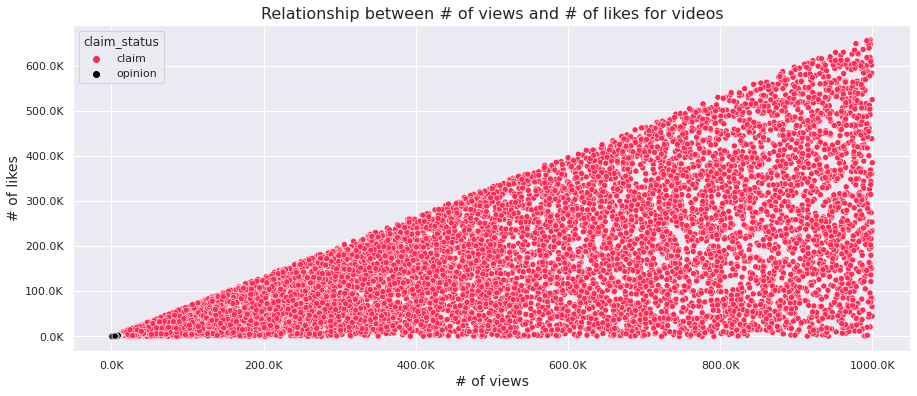

In [33]:
# Create a scatterplot of `video_view_count` versus `video_like_count` according to 'claim_status'
ax = sns.scatterplot(data=data, x="video_view_count", y="video_like_count", hue="claim_status", palette=colors[1:3])
xticklabels = list(map(lambda x: to_thousands(x), ax.get_xticks()))
yticklabels = list(map(lambda x: to_thousands(x), ax.get_yticks()))
ax.set_xticklabels(xticklabels)
ax.set_yticklabels(yticklabels)
ax.set_title("Relationship between # of views and # of likes for videos")
ax.set_xlabel("# of views")
ax.set_ylabel("# of likes");

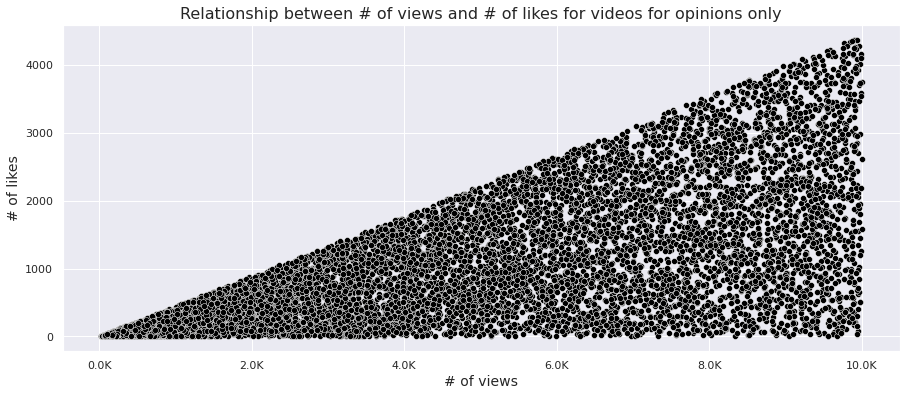

In [34]:
# Create a scatterplot of ``video_view_count` versus `video_like_count` for opinions only
df = data[data.claim_status == "opinion"]
ax = sns.scatterplot(data=df, x="video_view_count", y="video_like_count", color=colors[2])
xticklabels = list(map(lambda x: to_thousands(x), ax.get_xticks()))
ax.set_xticklabels(xticklabels)
ax.set_title("Relationship between # of views and # of likes for videos for opinions only")
ax.set_xlabel("# of views")
ax.set_ylabel("# of likes");

## Tableau dashboard for an executive summary (<a href="https://public.tableau.com/app/profile/mohammed.mustafa.mahomud/viz/TikTok-EDA/Dashboard1#1">Click Here</a>)

In [35]:
# Save the cleaned data to use it in Tableau
data.to_csv("cleaned-data.csv")